In [ ]:
import requests
r = requests.get('https://store.steampowered.com/search/?sort_by=Price_DESC&filter=topsellers')

In [ ]:
from bs4 import BeautifulSoup
page = BeautifulSoup(r.text, 'html.parser')

In [ ]:
!pip install selenium

In [ ]:
import time  # модуль для "засыпания" исполнителя, чтобы не было блокировки при парсинге
from selenium import webdriver  # Этот модуль позволяет нам управлять веб-браузером c использованием программы драйвера
from selenium.webdriver.common.keys import Keys  # модуль для нажатий по клавишам (для скроллинга)
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

# возвращает массив гиперссылок, начинающихся с https://store.steampowered.com/app/
def find_hrefs(page=r"https://store.steampowered.com/search/?sort_by=_ASC&filter=topsellers", number_of_pagedowns = 20, DEBUG=True):
    # driver_path = r"/opt/homebrew/bin/"

    options = webdriver.ChromeOptions()
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    browser = webdriver.Chrome(options=options)

    browser.get(page)

    time.sleep(1)  # чтобы перед скроллингом страница успела отобразиться

    body = browser.find_element(By.TAG_NAME, "body")

    for _ in range(number_of_pagedowns):
        body.send_keys(Keys.PAGE_DOWN)
        time.sleep(0.2)  # чтобы между скроллов страница успевала наполняться данными

    hrefs = browser.find_elements(By.XPATH, r"//a[@href]")
    print("href = " + str(hrefs))

    # преобразим наши ссылки в естественный вид
    for index, href in enumerate(hrefs):
        hrefs[index] = href.get_attribute("href")

    # отберем только нужные нам ссылки
    needed_hrefs = []
    for href in hrefs:
        if href.startswith(r"https://store.steampowered.com/app/"):
            needed_hrefs.append(href)

    needed_hrefs = set(needed_hrefs)  # убираем повторяющиеся ссылки

    if DEBUG:
        # вывод итоговых гиперссылок на экран
        for href in needed_hrefs:
            print(href)
        print("Получено ссылок:", len(needed_hrefs))

    return needed_hrefs

In [ ]:
!pip install webdriver-manager

In [ ]:
# копируем массив (т к мы случайно его можем изменить, а с этим трюком мы работаем не с массивом данных, а с его копией)
href_arr = find_hrefs(number_of_pagedowns=50)
href_arr_without_ads = []

for url in href_arr:
    href_arr_without_ads.append(url)

href = [<selenium.webdriver.remote.webelement.WebElement (session="a23ce693e824bb7874a5a328d9b2ed36", element="f.31E57250DE6FFF50B3C029CC1A5F705C.d.11F3057DC9D86208F5F585ACF7D117AB.e.44")>, <selenium.webdriver.remote.webelement.WebElement (session="a23ce693e824bb7874a5a328d9b2ed36", element="f.31E57250DE6FFF50B3C029CC1A5F705C.d.11F3057DC9D86208F5F585ACF7D117AB.e.46")>, <selenium.webdriver.remote.webelement.WebElement (session="a23ce693e824bb7874a5a328d9b2ed36", element="f.31E57250DE6FFF50B3C029CC1A5F705C.d.11F3057DC9D86208F5F585ACF7D117AB.e.818")>, <selenium.webdriver.remote.webelement.WebElement (session="a23ce693e824bb7874a5a328d9b2ed36", element="f.31E57250DE6FFF50B3C029CC1A5F705C.d.11F3057DC9D86208F5F585ACF7D117AB.e.819")>, <selenium.webdriver.remote.webelement.WebElement (session="a23ce693e824bb7874a5a328d9b2ed36", element="f.31E57250DE6FFF50B3C029CC1A5F705C.d.11F3057DC9D86208F5F585ACF7D117AB.e.820")>, <selenium.webdriver.remote.webelement.WebElement (session="a23ce693e824bb7874a5

In [ ]:
######################################################################
# ГЛАВНАЯ ФУНКЦИЯ:
######################################################################

In [ ]:
import requests
from bs4 import BeautifulSoup
from statistics import mean  # ср ариф для массива чисел

In [ ]:
# 21 параметр будет в нашем датасете:
names = []
genres = []
developers = []
publishers = []
franchises = []
dates = []
discount_prices = []
final_prices = []
middle_prices = []
min_systemOSs = []
min_CPUs = []
min_RAMs = []
min_GPUs = []
min_storages = []
rec_systemOSs = []
rec_CPUs = []
rec_RAMs = []
rec_GPUs = []
rec_storages = []
reviews = []
websites = []

In [ ]:
import numpy as np

In [ ]:
COUNTER = 0
DEBUG = True


# todo: разбить на функции
def find_info(url=r"https://store.steampowered.com/app/534380/Dying_Light_2_Stay_Human/", DEBUG=True):
    websites.append(url)
    global COUNTER
    COUNTER += 1
    print(COUNTER)
    print(url)
    g = requests.get(url)
    page = BeautifulSoup(g.text, "html.parser")

    if DEBUG:
        print(page.find(id="appHubAppName").text)  # название игры
        print()

    # INFO1
    info = page.find(id="genresAndManufacturer").text
    arr = info.split('\n')
    clear_arr = []
    for el in arr:
        if el != '':
            clear_arr.append(el)
#     print(clear_arr)
    clear_arr[0] = clear_arr[0].replace('Title: ', '')
    clear_arr[1] = clear_arr[1].replace('Genre: ', '')
    del clear_arr[2]
    del clear_arr[3]
    have_franchise = True
    try:
        if clear_arr[4] == "Franchise:":
            del clear_arr[4]
            if DEBUG:
                print("HAVE frunchise")
        else:
            have_franchise = False
            if DEBUG:
                print("DONOT have frunchise")
    except:
        while(len(clear_arr) < 5):
            clear_arr.append(np.nan)
        have_franchise = False
        if DEBUG:
            print("DONOT have frunchise")
    if have_franchise:
        if DEBUG:
            print(clear_arr)
        try:
            clear_arr[5] = clear_arr[5].replace('Release Date: ', '')
        except:
            pass
    else:
        try:
            clear_arr[4] = clear_arr[4].replace('Release Date: ', '')
        except:
            pass
    if DEBUG:
        print(clear_arr)
        print()
    names.append(clear_arr[0])
    genres.append(clear_arr[1])
    developers.append(clear_arr[2])
    publishers.append(clear_arr[3])
    if have_franchise:
        try:
            franchises.append(clear_arr[4])
        except:
            franchises.append(np.nan)
        try:
            dates.append(clear_arr[5])
        except:
            dates.append(np.nan)
    else:
        franchises.append(np.nan)
        dates.append(clear_arr[4])

    # INFO2
    discount_original_price_element = page.find("div", class_="discount_original_price")

    if (DEBUG):
      print("discount_original_price_element: ", discount_original_price_element)

    discount_original_price = np.nan

    if not discount_original_price_element:
        discount_original_price = 0
    else:
        try:
            price_text = discount_original_price_element.text.strip()
        except:
            price_text = str(discount_original_price_element).strip()

        if (price_text[:1] == "$"):
            price_text = price_text[1:]
        price_text = price_text.replace(',', '.')

        try:
            discount_original_price = int(float(price_text))
        except:
            discount_original_price = np.nan

    discount_prices.append(discount_original_price)
    if (DEBUG):
      print('discount_original_price:', discount_original_price)

    # INFO 2.1
    discount_final_price_element = page.find("div", class_="discount_final_price")

    if (DEBUG):
      print("discount_original_price_element: ", discount_final_price_element)

    discount_final_price = np.nan

    if not discount_final_price_element:
        discount_final_price = 0
    else:
        try:
            price_text = discount_final_price_element.text.strip()
        except:
            price_text = str(discount_final_price_element).strip()

        if (price_text[:1] == "$"):
            price_text = price_text[1:]
        price_text = price_text.replace(',', '.')

        try:
            discount_final_price = int(float(price_text))
        except:
            discount_final_price = np.nan

    final_prices.append(discount_final_price)
    if (DEBUG):
      print("discount_final_price:", discount_final_price)

    try:
        if not (isinstance(final_prices[-1], (int, float)) and isinstance(discount_prices[-1], (int, float))):
            middle_prices.append(np.nan)
        else:
            middle_prices.append(int((final_prices[-1] + discount_prices[-1]) / 2))
    except:
        middle_prices.append(np.nan)

    #######################################

    # INFO3
    info3 = page.find_all(class_="game_area_sys_req_leftCol")  # мин требования
    if not bool(info3):
        info3 = np.nan
    else:
        info3 = info3[0]
    if DEBUG:
        try:
            print(info3.text[info3.text.find('systemOS'):info3.text.find('Processor')].replace('systemOS: ', ''))  # ОС
        except:
            print('nan')
        try:
            print(info3.text[info3.text.find('Processor'):info3.text.find('Memory')].replace('Processor: ', ''))  # ЦП
        except:
            print('nan')
        try:
            print(info3.text[info3.text.find('Memory'):info3.text.find('Graphics')].replace('Memory: ', '').replace(' GB RAM', ''))  # ОЗУ (в ГБ)
        except:
            print('nan')
        try:
            print(info3.text[info3.text.find('Graphics'):info3.text.find('Storage')].replace('Graphics: ', ''))  # Видеокарта
        except:
            print('nan')
        try:
            print(info3.text[info3.text.find('Storage'):].replace('Storage: ', '').replace(' GB available space ', '').replace('\n', '').strip())  # мин свободное место (в ГБ)
        except:
            print('nan')
    try:
        var = info3.text[info3.text.find('systemOS'):info3.text.find('Processor')].replace('systemOS: ', '')
        if var != '':
            min_systemOSs.append(var)
        else:
            min_systemOSs.append(np.nan)
    except:
        min_systemOSs.append(np.nan)
    try:
        var = info3.text[info3.text.find('Processor'):info3.text.find('Memory')].replace('Processor: ', '')
        if var != '':
            min_CPUs.append(var)
        else:
            min_CPUs.append(np.nan)
    except:
        min_CPUs.append(np.nan)
    try:
        var = info3.text[info3.text.find('Memory'):info3.text.find('Graphics')].replace('Memory: ', '').replace(' GB RAM', '')
        if var != '':
            try:
                ram = float(var.split(' ')[0])
                if ram >= 512.0:  # т к значения могут быть в МБ
                    ram /= 1024
                ram = round(ram, 1)
                min_RAMs.append(ram)
            except:
                min_RAMs.append(np.nan)
        else:
            min_RAMs.append(np.nan)
    except:
        min_RAMs.append(np.nan)
    try:
        var = info3.text[info3.text.find('Graphics'):info3.text.find('Storage')].replace('Graphics: ', '')
        if var != '':
            min_GPUs.append(var)
        else:
            min_GPUs.append(np.nan)
    except:
        min_GPUs.append(np.nan)
    try:
        var = info3.text[info3.text.find('Storage'):].replace('Storage: ', '').replace(' GB available space ', '').replace('\n', '').strip()
        if var != '':
            try:
                storage = float(var.split(' ')[0])
                if storage >=159:
                    storage /= 1024
                storage = round(storage, 1)
                min_storages.append(storage)
            except:
                min_storages.append(np.nan)
        else:
            min_storages.append(np.nan)
    except:
        min_storages.append(np.nan)

    # INFO4
    info3 = page.find_all(class_="game_area_sys_req_rightCol")  # рекомендованные требования
    if not bool(info3):
        info3 = np.nan
    else:
        info3 = info3[0]
    if DEBUG:
        try:
            print(info3.text[info3.text.find('systemOS'):info3.text.find('Processor')].replace('systemOS: ', ''))  # ОС
        except:
            print('nan')
        try:
            print(info3.text[info3.text.find('Processor'):info3.text.find('Memory')].replace('Processor: ', ''))  # ЦП
        except:
            print('nan')
        try:
            print(info3.text[info3.text.find('Memory'):info3.text.find('Graphics')].replace('Memory: ', '').replace(' GB RAM', ''))  # ОЗУ (в ГБ)
        except:
            print('nan')
        try:
            print(info3.text[info3.text.find('Graphics'):info3.text.find('Storage')].replace('Graphics: ', ''))  # Видеокарта
        except:
            print('nan')
        try:
            print(info3.text[info3.text.find('Storage'):].replace('Storage: ', '').replace(' GB available space ', '').replace('\n', '').strip())  # мин свободное место (в ГБ)
        except:
            print('nan')
    try:
        var = info3.text[info3.text.find('systemOS'):info3.text.find('Processor')].replace('systemOS: ', '')
        if var != '':
            rec_systemOSs.append(var)
        else:
            rec_systemOSs.append(np.nan)
    except:
         rec_systemOSs.append(np.nan)
    try:
        var = info3.text[info3.text.find('Processor'):info3.text.find('Memory')].replace('Processor: ', '')
        if var != '':
            rec_CPUs.append(var)
        else:
            rec_CPUs.append(np.nan)
    except:
        rec_CPUs.append(np.nan)
    try:
        var = info3.text[info3.text.find('Memory'):info3.text.find('Graphics')].replace('Memory: ', '').replace(' GB RAM', '')
        if var != '':
            try:
                ram = float(var.split(' ')[0])
                if ram >= 512.0:  # т к значения могут быть в МБ
                    ram /= 1024
                ram = round(ram, 1)
                rec_RAMs.append(ram)
            except:
                rec_RAMs.append(np.nan)
        else:
            rec_RAMs.append(np.nan)
    except:
        rec_RAMs.append(np.nan)
    try:
        var = info3.text[info3.text.find('Graphics'):info3.text.find('Storage')].replace('Graphics: ', '')
        if var != '':
            rec_GPUs.append(var)
        else:
            rec_GPUs.append(np.nan)
    except:
        rec_GPUs.append(np.nan)
    try:
        var = info3.text[info3.text.find('Storage'):].replace('Storage: ', '').replace(' GB available space ', '').replace('\n', '').strip()
        if var != '':
            try:
                storage = float(var.split(' ')[0])
                if storage >=159:
                    storage /= 1024
                storage = round(storage, 1)
                rec_storages.append(storage)
            except:
                rec_storages.append(np.nan)
        else:
            rec_storages.append(np.nan)
    except:
        rec_storages.append(np.nan)

    # INFO5
    info5 = page.find_all(class_="summary column")  # обзоры, краткая информауция
    if not bool(info5):
        info5 = np.nan
    else:
        info5 = info5[0]
    if DEBUG and info5 != np.nan:
        try:
            print(info5.text.replace('\t', '').replace('\n', '').replace('\r', ''))
        except:
            print('nan')
    elif DEBUG:
        print('nan')
    try:
        reviews.append(info5.text.replace('\t', '').replace('\n', '').replace('\r', ''))
    except:
        reviews.append(np.nan)



In [ ]:
diction = {'Name': names, 'Genre': genres, 'Developer': developers, 'Publisher': publishers, 'Franchise': franchises,
           'Date': dates, 'DiscountPrice': discount_prices, 'FinalPrice': final_prices, 'MiddlePrice': middle_prices,
           'minOS': min_systemOSs, 'minCPU': min_CPUs, 'minRAM(GB)': min_RAMs, 'minGPU': min_GPUs, 'minStorage(GB)': min_storages,
           'recOS': rec_systemOSs, 'recCPU': rec_CPUs, 'recRAM(GB)': rec_RAMs, 'recGPU': rec_GPUs, 'recStorage(GB)': rec_storages,
           'Review': reviews, 'Website': websites}

len(diction)

21

In [ ]:
# черный список адресов
black_list = []
black_list.append(r"https://store.steampowered.com/app/1149640/RimWorld__Royalty/")
black_list.append(r"https://store.steampowered.com/app/1289670/EA_Play/?snr=1_7_7_7000_150_1")
black_list.append(r"https://store.steampowered.com/app/219740/Dont_Starve/?snr=1_7_7_7000_150_15")

In [ ]:
href_arr_without_ads

['https://store.steampowered.com/app/550/Left_4_Dead_2/?snr=1_7_7_7000_150_5',
 'https://store.steampowered.com/app/2670630/Supermarket_Simulator/?snr=1_7_7_7000_150_5',
 'https://store.steampowered.com/app/568220/Lobotomy_Corporation__Monster_Management_Simulation/?snr=1_7_7_7000_150_5',
 'https://store.steampowered.com/app/2026000/Our_Adventurer_Guild/?snr=1_7_7_7000_150_7',
 'https://store.steampowered.com/app/1172710/Dune_Awakening/?snr=1_7_7_7000_150_6',
 'https://store.steampowered.com/app/3454980/Mortal_Kombat_Legacy_Kollection/?snr=1_7_7_7000_150_4',
 'https://store.steampowered.com/app/2893570/DRAGON_QUEST_I__II_HD2D_Remake/?snr=1_7_7_7000_150_3',
 'https://store.steampowered.com/app/413150/Stardew_Valley/?snr=1_7_7_7000_150_3',
 'https://store.steampowered.com/app/1395520/The_Sance_of_Blake_Manor/?snr=1_7_7_7000_150_2',
 'https://store.steampowered.com/app/264710/Subnautica/?snr=1_7_7_7000_150_3',
 'https://store.steampowered.com/app/714010/Aimlabs/?snr=1_7_7_7000_150_7',
 'h

In [ ]:
# парсим 622 игры
for URL in href_arr_without_ads:
    if URL not in black_list:
      try:
        find_info(url=URL, DEBUG=False)
      except:
        print("some custom code, skip it")
diction

1
https://store.steampowered.com/app/550/Left_4_Dead_2/?snr=1_7_7_7000_150_5
2
https://store.steampowered.com/app/2670630/Supermarket_Simulator/?snr=1_7_7_7000_150_5
3
https://store.steampowered.com/app/568220/Lobotomy_Corporation__Monster_Management_Simulation/?snr=1_7_7_7000_150_5
4
https://store.steampowered.com/app/2026000/Our_Adventurer_Guild/?snr=1_7_7_7000_150_7
5
https://store.steampowered.com/app/1172710/Dune_Awakening/?snr=1_7_7_7000_150_6
6
https://store.steampowered.com/app/3454980/Mortal_Kombat_Legacy_Kollection/?snr=1_7_7_7000_150_4
7
https://store.steampowered.com/app/2893570/DRAGON_QUEST_I__II_HD2D_Remake/?snr=1_7_7_7000_150_3
8
https://store.steampowered.com/app/413150/Stardew_Valley/?snr=1_7_7_7000_150_3
9
https://store.steampowered.com/app/1395520/The_Sance_of_Blake_Manor/?snr=1_7_7_7000_150_2
10
https://store.steampowered.com/app/264710/Subnautica/?snr=1_7_7_7000_150_3
11
https://store.steampowered.com/app/714010/Aimlabs/?snr=1_7_7_7000_150_7
12
https://store.steamp

{'Name': ['Left 4 Dead 2',
  'Supermarket Simulator',
  'Lobotomy Corporation | Monster Management Simulation',
  'Our Adventurer Guild',
  'Dune: Awakening',
  'Mortal Kombat: Legacy Kollection',
  'DRAGON QUEST I & II HD-2D Remake',
  'Stardew Valley',
  'The Séance of Blake Manor',
  'Subnautica',
  'Aimlabs',
  'Town to City',
  'Dementium: The Ward',
  'Barotrauma',
  'Dead Island 2',
  'American Truck Simulator',
  'ELDEN RING NIGHTREIGN',
  'Warframe',
  'Fellowship',
  'The Binding of Isaac: Rebirth',
  'Guild Wars 2',
  'Killing Floor 2',
  'Escape From Duckov',
  'Diablo® IV',
  'Look Outside',
  'Arma Reforger',
  'LEGO® Party!',
  'Wreckreation',
  'Monster Hunter Wilds',
  'Manor Lords',
  "Tom Clancy's Ghost Recon® Wildlands",
  'Team Fortress 2',
  'Digimon Story Time Stranger',
  'Demonologist',
  'House Flipper 2 - Scooby-Doo DLC',
  'Ready or Not',
  'MiSide',
  'Phasmophobia',
  'Core Keeper',
  'VRChat',
  'Escape the Backrooms',
  'Age of Empires IV: Anniversary Ed

In [ ]:
from collections import Counter

lengths = [len(array) for array in diction.values()]

most_common_length = Counter(lengths).most_common(1)[0][0]

filtered_data = {key: array for key, array in diction.items() if len(array) == most_common_length}

diction = filtered_data

diction

{'Name': ['Left 4 Dead 2',
  'Supermarket Simulator',
  'Lobotomy Corporation | Monster Management Simulation',
  'Our Adventurer Guild',
  'Dune: Awakening',
  'Mortal Kombat: Legacy Kollection',
  'DRAGON QUEST I & II HD-2D Remake',
  'Stardew Valley',
  'The Séance of Blake Manor',
  'Subnautica',
  'Aimlabs',
  'Town to City',
  'Dementium: The Ward',
  'Barotrauma',
  'Dead Island 2',
  'American Truck Simulator',
  'ELDEN RING NIGHTREIGN',
  'Warframe',
  'Fellowship',
  'The Binding of Isaac: Rebirth',
  'Guild Wars 2',
  'Killing Floor 2',
  'Escape From Duckov',
  'Diablo® IV',
  'Look Outside',
  'Arma Reforger',
  'LEGO® Party!',
  'Wreckreation',
  'Monster Hunter Wilds',
  'Manor Lords',
  "Tom Clancy's Ghost Recon® Wildlands",
  'Team Fortress 2',
  'Digimon Story Time Stranger',
  'Demonologist',
  'House Flipper 2 - Scooby-Doo DLC',
  'Ready or Not',
  'MiSide',
  'Phasmophobia',
  'Core Keeper',
  'VRChat',
  'Escape the Backrooms',
  'Age of Empires IV: Anniversary Ed

In [ ]:
import pandas as pd
df = pd.DataFrame(diction)
df.tail(20)
# примечание: NaN значит что данных по данному показателю данной игры нет, т к эта игра - новинка!

,Name,Genre,Developer,Publisher,Franchise,Date,DiscountPrice,FinalPrice,MiddlePrice,minOS,minCPU,minRAM(GB),minGPU,minStorage(GB),recOS,recCPU,recRAM(GB),recGPU,recStorage(GB),Review
326,Outlast,"Action, Adventure, Indie",Red Barrels,Red Barrels,Outlast,"Sep 4, 2013",14,3,8,NaN,2.2 GHz Dual Core CPU,2.0,512 MB NVIDIA GeForce 9800GTX / ATI Radeon HD ...,5.0,NaN,2.8 GHz Quad Core CPU,3.0,1GB NVIDIA GTX 460 / ATI Radeon HD 6850 or bet...,5.0,Overwhelmingly Positive(864)- 95% of the 864 u...
327,The Mortuary Assistant,"Adventure, Indie, Simulation",DarkStone Digital,DreadXP,DreadXP,"Aug 2, 2022",24,14,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very Positive(102)- 89% of the 102 user review...
328,iRacing,"Massively Multiplayer, Racing, Simulation, Sports","iRacing.com Motorsport Simulations, iRacing","iRacing.com Motorsport Simulations, iRacing",NaN,"Jan 12, 2015",0,0,0,"Windows 10 64-Bit, Windows 11 64-Bit",4 core CPU or better – Some examples (but not ...,16.0,A gaming graphics card with at least 4GB of DE...,25.0,"Windows 10 64-Bit, Windows 11 64-Bit",8 core or more CPU (some examples but not limi...,32.0,Gaming graphics card with at least 8GB of DEDI...,100.0,Mostly Positive(131)- 77% of the 131 user revi...
329,Pax Dei,"Massively Multiplayer, RPG",Mainframe Industries,Mainframe Industries,NaN,"Oct 16, 2025",0,0,0,Windows 10,Intel i5-7600K or AMD equivalent,16.0,GeForce RTX 2060 (12 GB) / Radeon RX 5700 XT |...,80.0,Windows 10,Ryzen 7 3700X or Intel equivalent,16.0,GeForce RTX 3060 / Radeon RX 6600 XT | VRAM: 8...,80.0,Mixed(696)- 51% of the 696 user reviews in the...
330,Crusader Kings III: All Under Heaven,"RPG, Simulation, Strategy",Paradox Development Studio,Paradox Interactive,Crusader Kings,"Oct 28, 2025",74,44,59,Windows® 10 Home 64 bit,Intel Core i5-750 | AMD FX 4300,8.0,NVIDIA GeForce GTX 660 | AMD Radeon HD 7870 | ...,20.0,Windows® 10 (64-bit) or Windows® 11,Intel Core i5-8400 | AMD Ryzen 5 1600X,16.0,NVIDIA GeForce GTX 970 | AMD Radeon RX 480 | I...,20.0,Very Positive(475)- 86% of the 475 user review...
331,Factorio: Space Age,"Casual, Indie, Simulation, Strategy",Wube Software LTD.,Wube Software LTD.,NaN,"Oct 21, 2024",0,0,0,NaN,Quad core 3Ghz+,8.0,DirectX 11 capable GPU with 1GB VRAM - GeForce...,5.0,NaN,Quad core 4Ghz+ from 2020 or newer,16.0,DirectX 11 capable GPU with 4 GB VRAM - GeForc...,10.0,Very Positive(64)- 81% of the 64 user reviews ...
332,Sonic Racing: CrossWorlds,"Action, Adventure, Racing",Sonic Team,SEGA,Sonic the Hedgehog,"Sep 25, 2025",0,0,0,Windows 10,Intel Core i5-3470 or AMD Ryzen 3 1200,12.0,"NVIDIA GeForce GTX 1630, 4GB or AMD Radeon R9 ...",20.0,Windows 11,Intel Core i7-8700K or AMD Ryzen 5 2600,12.0,"NVIDIA GeForce GTX 1660 Ti, 6 GB or AMD Radeon...",20.0,"Very Positive(2,510)- 93% of the 2,510 user re..."
333,HELLDIVERS™ 2,Action,Arrowhead Game Studios,PlayStation Publishing LLC,"HELLDIVERS™, PlayStation Studios","Feb 8, 2024",0,59,29,Windows 10,Intel Core i7-4790K or AMD Ryzen 5 1500X,8.0,NVIDIA GeForce GTX 1050 Ti or AMD Radeon RX 470,135.0,Windows 10,Intel Core i7-9700K or AMD Ryzen 7 3700X,16.0,NVIDIA GeForce RTX 2060 or AMD Radeon RX 6600XT,135.0,"Mixed(6,968)- 62% of the 6,968 user reviews in..."
334,Crusader Kings III,"RPG, Simulation, Strategy",Paradox Development Studio,Paradox Interactive,Crusader Kings,"Sep 1, 2020",49,14,31,Windows® 10 Home 64 bit,Intel Core i5-750 | AMD FX 4300,8.0,NVIDIA GeForce GTX 660 | AMD Radeon HD 7870 | ...,20.0,Windows® 10 Home 64 bit or Windows® 11,Intel Core i5-8400 | AMD Ryzen 5 1600X,16.0,NVIDIA GeForce GTX 970 | AMD Radeon RX 480 | I...,20.0,Very Positive(910)- 81% of the 910 user review...
335,EA SPORTS™ Madden NFL 26,"Simulation, Sports",Tiburon,Electronic Arts,Madden NFL,"Aug 14, 2025",0,97,48,NaN,Intel Core i7-6700K (4-cores; 8-threads) or AM...,10.0,NVIDIA GeForce GTX 1050 Ti 4GB or AMD Radeon R...,65.0,NaN,Intel Core i7-8700K (6-core; 12-thread) or AMD...,12.0,NVIDIA GeForce RTX 3060 8GB or AMD RX 6600 XT ...,65.0,Mixed(523)- 44% of the 523 

In [ ]:
# переносим наш датасет в Excel
writer = pd.ExcelWriter('games_final_corrected_2.xlsx')
df.to_excel(writer, 'topsellers')
writer.close()

/tmp/ipython-input-2515113295.py:3: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  df.to_excel(writer, 'topsellers')


In [ ]:
# Выведем все игры, подходящие для пользователей с 4 ГБ ОЗУ
df[df["minRAM(GB)"] <= 4]

,Name,Genre,Developer,Publisher,Franchise,Date,DiscountPrice,FinalPrice,MiddlePrice,minOS,minCPU,minRAM(GB),minGPU,minStorage(GB),recOS,recCPU,recRAM(GB),recGPU,recStorage(GB),Review
0,Left 4 Dead 2,Action,Valve,Valve,NaN,"Nov 16, 2009",9,1,5,NaN,Pentium 4 3.0GHz,2.0,"Video card with 128 MB, Shader model 2.0. ATI ...",13.0,NaN,Intel core 2 duo 2.4GHz,2.0,"Video Card Shader model 3.0. NVidia 7600, ATI ...",13.0,"Overwhelmingly Positive(6,169)- 97% of the 6,1..."
9,Subnautica,"Adventure, Indie",Unknown Worlds Entertainment,Unknown Worlds Entertainment,"Subnautica, KRAFTON, Inc.","Jan 23, 2018",29,14,21,"systemOS *: Windows Vista SP2 or newer, 64-bit",Intel Haswell 2 cores / 4 threads @ 2.5Ghz or ...,4.0,Intel HD 4600 or equivalent - This includes mo...,20.0,"systemOS *: Windows Vista SP2 or newer, 64-bit",Intel Haswell 4 cores / 4 threads @ 3.2Ghz or ...,8.0,"Nvidia GTX 550 Ti or equivalent, 2GB VRAMDirec...",20.0,"Overwhelmingly Positive(2,506)- 96% of the 2,5..."
10,Aimlabs,"Action, Adventure, Casual, Indie, Simulation, ...",Statespace,Statespace,NaN,"Jun 16, 2023",0,0,0,NaN,Intel® Core™ 2 Duo E6600 or AMD Phenom™ X3 875...,4.0,GTX 560 and upNetwork: Broadband Internet conn...,12.0,NaN,Intel® Core™ 2 Duo E6600 or AMD Phenom™ X3 875...,4.0,GTX 560 and upNetwork: Broadband Internet conn...,20.0,Mostly Positive(956)- 78% of the 956 user revi...
12,Dementium: The Ward,"Action, Adventure, Indie",Atooi,Atooi,NaN,"Oct 27, 2025",14,8,11,Windows 10 (or later),Intel or AMD Dual Core at 2 GHz or better,4.0,Intel Graphics 4400 or betterDirectX: Version 12,0.8,NaN,NaN,NaN,NaN,NaN,Very Positive(67)- 98% of the 67 user reviews ...
13,Barotrauma,"Action, Indie, Simulation, Strategy","FakeFish, Undertow Games",Daedalic Entertainment,Daedalic Entertainment,"Mar 13, 2023",34,17,25,systemOS *: Windows 7/8.1/10 (64-bit versions),Dual Core 2.4 GHz,4.0,"2 GB memory (dedicated VRAM or shared RAM), Sh...",2.0,systemOS *: Windows 7/8.1/10 (64-bit versions),Quad Core 3.0 GHz,8.0,GeForce GTX 950 or Radeon R9 370 or equivalent...,2.0,Very Positive(648)- 94% of the 648 user review...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,Plants vs. Zombies™: Replanted,Strategy,"PopCap Games, The Lost Pixels",Electronic Arts,Plants vs. Zombies,"Oct 23, 2025",0,0,0,Windows 10 64-bit or later,AMD FX-6300 / 3rd gen i3 or better,4.0,Intel Integrated GraphicsDirectX: Version 11,4.0,Windows 10 64-bit or later,Intel i5 6600 or equivalent,8.0,"Radeon HD 7730 or better, GeForce GT 640 or be...",4.0,"Mixed(1,256)- 51% of the 1,256 user reviews fo..."
323,Megabonk,"Action, Casual, Indie",vedinad,vedinad,NaN,"Sep 18, 2025",0,0,0,Windows 10 (64-bit),potato,2.0,noDirectX: Version 11,0.5,Windows 10 (64-bit),potato 2,2.0,yesDirectX: Version 12,0.5,"Very Positive(30,930)- 93% of the 30,930 user ..."
324,Gunfire Reborn,"Action, Adventure, Indie, RPG",Duoyi Games,Duoyi Games,"枪火, Gunfire","Nov 17, 2021",19,10,14,systemOS *: Windows 7,Intel Core i5-6400 / AMD FX-8320,4.0,GTX 960 / R9 280DirectX: Version 11Network: Br...,4.0,Windows 10,Intel Core i5-7500 / AMD Ryzen 5 1400,8.0,GTX 1060 / R9 390DirectX: Version 11Network: B...,4.0,Very Positive(469)- 87% of the 469 user review...
326,Outlast,"Action, Adventure, Indie",Red Barrels,Red Barrels,Outlast,"Sep 4, 2013",14,3,8,NaN,2.2 GHz Dual Core CPU,2.0,512 MB NVIDIA GeForce 9800GTX / ATI Radeon HD ...,5.0,NaN,2.8 GHz Quad Core CPU,3.0,1GB NVIDIA GTX 460 / ATI Radeon HD 6850 or bet...,5.0,Overwhelmingly Positive(864)- 95% of the 864 u...


In [ ]:
# посчитать игры класса "премиум": сколько игр стоят больше 2 тыс рублей
df = df.dropna()

df['DiscountPrice'] = df['DiscountPrice'].dropna().astype('int64')
df[df["DiscountPrice"] >= 30]

,Name,Genre,Developer,Publisher,Franchise,Date,DiscountPrice,FinalPrice,MiddlePrice,minOS,minCPU,minRAM(GB),minGPU,minStorage(GB),recOS,recCPU,recRAM(GB),recGPU,recStorage(GB),Review
5,Mortal Kombat: Legacy Kollection,Action,Digital Eclipse,"Digital Eclipse, Atari","Mortal Kombat, Digital Eclipse","Oct 30, 2025",49,44,46,Windows 10 (64-bit),"Intel Core i3-4100, AMD A8-6600K",8.0,"Nvidia GeForce GTX 460, AMD Radeon R7 250X",16.0,Windows 11 (64-bit),"Intel Core i3-10100, AMD Ryzen 3 4300G",16.0,"Nvidia GeForce GTX 950, AMD Radeon RX 550Netwo...",16.0,No user reviews
13,Barotrauma,"Action, Indie, Simulation, Strategy","FakeFish, Undertow Games",Daedalic Entertainment,Daedalic Entertainment,"Mar 13, 2023",34,17,25,systemOS *: Windows 7/8.1/10 (64-bit versions),Dual Core 2.4 GHz,4.0,"2 GB memory (dedicated VRAM or shared RAM), Sh...",2.0,systemOS *: Windows 7/8.1/10 (64-bit versions),Quad Core 3.0 GHz,8.0,GeForce GTX 950 or Radeon R9 370 or equivalent...,2.0,Very Positive(648)- 94% of the 648 user review...
14,Dead Island 2,"Action, Adventure",Dambuster Studios,Deep Silver,Dead Island,"Apr 22, 2024",49,14,31,Windows 10,AMD FX-9590 / Intel Core i7-7700HQ,10.0,Radeon R9 390X (8192 VRAM) / GeForce GTX 1060 ...,70.0,Windows 10,Ryzen 5 5600X / Intel Core i9-9900k,10.0,Radeon RX 6800 XT (16384 VRAM) / GeForce RTX 2...,70.0,Mostly Positive(323)- 75% of the 323 user revi...
25,Arma Reforger,"Action, Simulation, Strategy",Bohemia Interactive,Bohemia Interactive,Arma Franchise,"Nov 16, 2023",40,36,38,Windows 10 64-bit,Intel Core i5-4460 / AMD FX-4300,8.0,NVIDIA GeForce GTX 1650 or AMD Radeon RX 570Di...,20.0,Windows 10/11 64-bit,Intel Core i7-6700 or AMD equivalent,16.0,NVIDIA GeForce GTX 1070 Ti or AMD Radeon RX 56...,25.0,"Very Positive(1,255)- 86% of the 1,255 user re..."
29,Manor Lords,"Simulation, Strategy, Early Access",Slavic Magic,Hooded Horse,Hooded Horse,"Apr 26, 2024",296,103,199,Windows® 10 (64-bit),Intel® Core™ i5-4670 (quad-core) / AMD® FX-Se...,8.0,NVIDIA® GeForce® GTX 1050 (2 GB) / AMD® Radeon...,15.0,Windows® 10 (64-bit),Intel® Core™ i5-7600 (quad-core) / AMD® Ryzen™...,12.0,NVIDIA® GeForce® GTX 1060 (6 GB) / AMD® Radeon...,15.0,"Very Positive(2,144)- 82% of the 2,144 user re..."
44,Far Cry® 5,"Action, Adventure","Ubisoft Montreal, Red Storm, Ubisoft Shanghai,...",Ubisoft,Far Cry,"Mar 26, 2018",59,8,33,Windows 10 (64-bit versions only),Intel Core i5-2400 @ 3.1 GHz or AMD FX-6300 @ ...,8.0,NVIDIA GeForce GTX 670 or AMD R9 270 (2GB VRAM...,40.0,Windows 10 (64-bit versions only),Intel Core i7-4770 @ 3.4 GHz or AMD Ryzen 5 16...,8.0,NVIDIA GeForce GTX 970 or AMD R9 290X (4GB VRA...,40.0,"Very Positive(1,070)- 82% of the 1,070 user re..."
55,Assassin's Creed Valhalla,"Action, Adventure, RPG",Ubisoft Montreal,Ubisoft,Assassin's Creed,"Dec 6, 2022",59,14,36,Windows 10 (versions 64 bits uniquement),AMD Ryzen 3 1200 3.1 GHz / Intel Core i5-4460 ...,8.0,AMD R9 380 /NVIDIA GeForce GTX 960DirectX: Ver...,0.2,Windows 10 (versions 64 bits uniquement),AMD Ryzen 5 1600 3.2 GHz / Intel Core i7-4790 ...,8.0,AMD R9 380 /NVIDIA GeForce GTX 960DirectX: Ver...,0.2,Mixed(653)- 68% of the 653 user reviews in the...
61,System Shock,"Action, Adventure",Nightdive Studios,"Atari, Nightdive Studios","System Shock, Nightdive Studios, Atari","May 30, 2023",39,13,26,systemOS *: Windows 7/8.1/10 (64-bit only),Intel Core i5-2400/AMD FX-8320 or better,4.0,NVIDIA GTX 670 2GB/AMD Radeon HD 7870 2GB or b...,10.0,systemOS *: Windows 7/8.1/10 (64-bit only),Intel Core i7-3770/AMD FX-8350 or better,8.0,NVIDIA GTX 970 4GB/AMD Radeon R9 290 4GB or be...,10.0,Very Positive(106)- 80% of the 106 user review...
63,Hunt: Showdown 1896,Action,Crytek,Crytek,Hunt,"Aug 27, 2019",39,17,28,Windows 10 64 bit,Intel CPU 7th Gen 7700 / AMD Ryzen 5 2600,8.0,NVIDIA GTX 1650 Super or AMD Radeon RX 5500 XT...,75.0,Windows 11 64 bit,Intel CPU 8th Gen 8700 / AMD Ryzen 5 2700,12.0,"RTX 2060 Super / AMD 6600 XT, with a minimum o...",75.0,"Mostly Positive(1,513)- 73% of the 1,513 user ..."
6

In [ ]:
# add index by hand

In [ ]:
# читаем из excel наш датасет
df_dataset = pd.read_excel('games_final_corrected_2.xlsx', index_col='Index')
df_dataset

,Name,Genre,Developer,Publisher,Franchise,Date,DiscountPrice,FinalPrice,MiddlePrice,minOS,minCPU,minRAM(GB),minGPU,minStorage(GB),recOS,recCPU,recRAM(GB),recGPU,recStorage(GB),Review
Index,,,,,,,,,,,,,,,,,,,,
5,Mortal Kombat: Legacy Kollection,Action,Digital Eclipse,"Digital Eclipse, Atari","Mortal Kombat, Digital Eclipse","Oct 30, 2025",49,44,46,Windows 10 (64-bit),"Intel Core i3-4100, AMD A8-6600K",8,"Nvidia GeForce GTX 460, AMD Radeon R7 250X",16.0,Windows 11 (64-bit),"Intel Core i3-10100, AMD Ryzen 3 4300G",16,"Nvidia GeForce GTX 950, AMD Radeon RX 550Netwo...",16.0,No user reviews
6,DRAGON QUEST I & II HD-2D Remake,RPG,"Square Enix, ARTDINK",Square Enix,DRAGON QUEST,"Oct 30, 2025",0,0,0,Windows® 11,AMD Ryzen™ 3 2300X / Intel® Core™ i3-8100,8,AMD Radeon™ RX 460 / Intel® Arc™ A380 / NVIDIA...,20.0,Windows® 11,AMD Ryzen™ 3 2300X / Intel® Core™ i3-8100,8,AMD Radeon™ RX 470 / Intel® Arc™ A580 / NVIDIA...,20.0,No user reviews
9,Subnautica,"Adventure, Indie",Unknown Worlds Entertainment,Unknown Worlds Entertainment,"Subnautica, KRAFTON, Inc.","Jan 23, 2018",29,14,21,"systemOS *: Windows Vista SP2 or newer, 64-bit",Intel Haswell 2 cores / 4 threads @ 2.5Ghz or ...,4,Intel HD 4600 or equivalent - This includes mo...,20.0,"systemOS *: Windows Vista SP2 or newer, 64-bit",Intel Haswell 4 cores / 4 threads @ 3.2Ghz or ...,8,"Nvidia GTX 550 Ti or equivalent, 2GB VRAMDirec...",20.0,"Overwhelmingly Positive(2,506)- 96% of the 2,5..."
13,Barotrauma,"Action, Indie, Simulation, Strategy","FakeFish, Undertow Games",Daedalic Entertainment,Daedalic Entertainment,"Mar 13, 2023",34,17,25,systemOS *: Windows 7/8.1/10 (64-bit versions),Dual Core 2.4 GHz,4,"2 GB memory (dedicated VRAM or shared RAM), Sh...",2.0,systemOS *: Windows 7/8.1/10 (64-bit versions),Quad Core 3.0 GHz,8,GeForce GTX 950 or Radeon R9 370 or equivalent...,2.0,Very Positive(648)- 94% of the 648 user review...
14,Dead Island 2,"Action, Adventure",Dambuster Studios,Deep Silver,Dead Island,"Apr 22, 2024",49,14,31,Windows 10,AMD FX-9590 / Intel Core i7-7700HQ,10,Radeon R9 390X (8192 VRAM) / GeForce GTX 1060 ...,70.0,Windows 10,Ryzen 5 5600X / Intel Core i9-9900k,10,Radeon RX 6800 XT (16384 VRAM) / GeForce RTX 2...,70.0,Mostly Positive(323)- 75% of the 323 user revi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,HELLDIVERS™ 2,Action,Arrowhead Game Studios,PlayStation Publishing LLC,"HELLDIVERS™, PlayStation Studios","Feb 8, 2024",0,59,29,Windows 10,Intel Core i7-4790K or AMD Ryzen 5 1500X,8,NVIDIA GeForce GTX 1050 Ti or AMD Radeon RX 470,135.0,Windows 10,Intel Core i7-9700K or AMD Ryzen 7 3700X,16,NVIDIA GeForce RTX 2060 or AMD Radeon RX 6600XT,135.0,"Mixed(6,968)- 62% of the 6,968 user reviews in..."
334,Crusader Kings III,"RPG, Simulation, Strategy",Paradox Development Studio,Paradox Interactive,Crusader Kings,"Sep 1, 2020",49,14,31,Windows® 10 Home 64 bit,Intel Core i5-750 | AMD FX 4300,8,NVIDIA GeForce GTX 660 | AMD Radeon HD 7870 | ...,20.0,Windows® 10 Home 64 bit or Windows® 11,Intel Core i5-8400 | AMD Ryzen 5 1600X,16,NVIDIA GeForce GTX 970 | AMD Radeon RX 480 | I...,20.0,Very Positive(910)- 81% of the 910 user review...
339,Escape Simulator 2,"Adventure, Casual, Indie, Simulation",Pine Studio,Pine Studio,"Escape Simulator, Pine Studio","Oct 27, 2025",19,17,18,Windows 10 version 21H1 (or newer),X64 architecture with SSE2 instruction set sup...,8,DX11 capable GPU (4 GB)DirectX: Version 11,20.0,Windows 10 version 21H1 (or newer),X64 architecture with SSE2 instruction set sup...,16,DX11 capable GPU (6 GB)DirectX: Version 11Netw...,40.0,Very Positive(260)- 97% of the 260 user review...


In [ ]:
# Частотный анализ парметра minRAM(GB)
df_dataset['minRAM(GB)'].value_counts()
# ВЫВОД: 8 ГБ ОЗУ - самое популярное требование разработчиков для пользователей своей игры

,count
minRAM(GB),
8,77
16,21
4,20
6,9
12,4
3,2
10,1
2,1


/tmp/ipython-input-2163834270.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_dataset.DiscountPrice.dropna(), fit=norm)


<Axes: xlabel='DiscountPrice', ylabel='Density'>

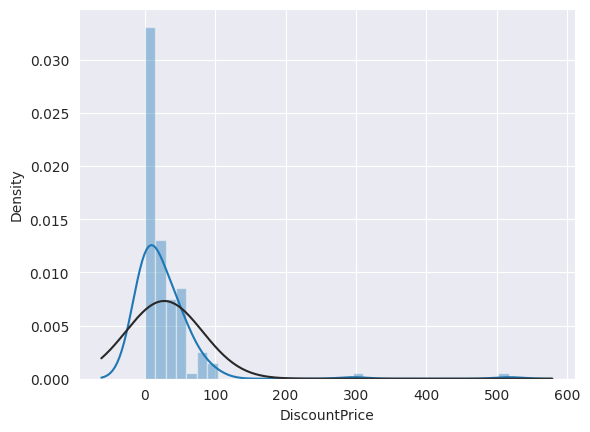

In [ ]:
# Описательная статистику цен базовых пакетов приложений
import seaborn as sns
from scipy.stats import norm
sns.distplot(df_dataset.DiscountPrice.dropna(), fit=norm)
# ВЫВОД: большинство приложений стоят в пределах [0, 100]

<Axes: xlabel='DiscountPrice', ylabel='minStorage(GB)'>

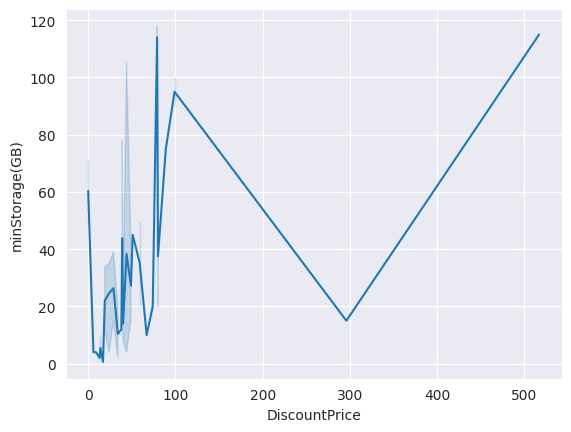

In [ ]:
# Зависимость цены и размера игры
sns.set_style("darkgrid")
sns.lineplot(data = df_dataset, x = "DiscountPrice", y = "minStorage(GB)")
# Вывод: таковой зависимости нет, т к волатильность графика очень большая

<Axes: >

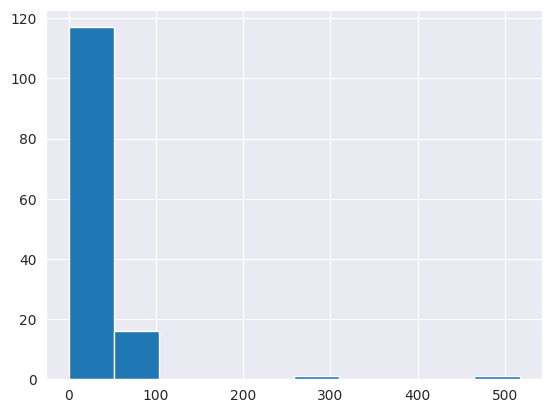

In [ ]:
# Гистограмма мин цен игр
df_dataset.DiscountPrice.hist()
# ВЫВОД: большинство приложений стоят в пределах [0, 100]

<Axes: title={'center': 'minRAM(GB)'}, ylabel='gigabytes'>

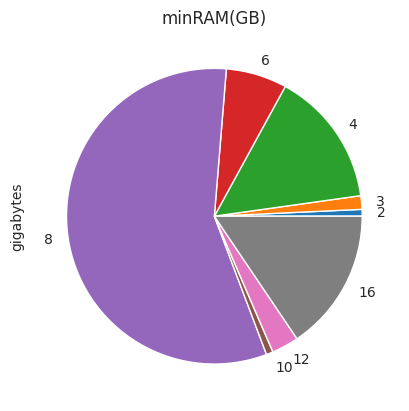

In [ ]:
# Круговая диаграмма для параметра minRAM(GB)
df_dataset.groupby('minRAM(GB)').size().plot(kind='pie', title='minRAM(GB)', ylabel='gigabytes')
# ВЫВОД: 8.0 ГБ ОЗУ по популярности преобладают перед другими размерами ОЗУ

<Axes: xlabel='minRAM(GB)', ylabel='DiscountPrice'>

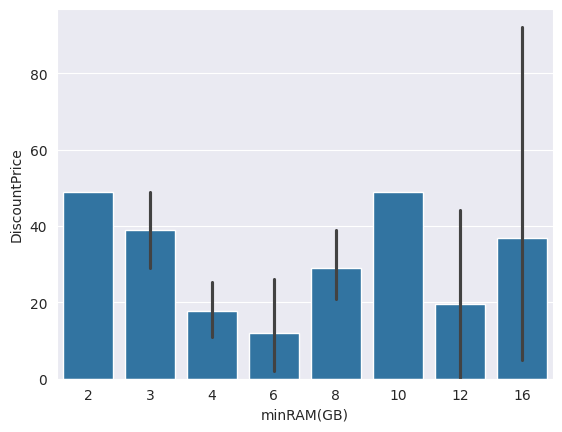

In [ ]:
# Cравнение цены игр с различными требованиями ОЗУ
sns.barplot(data=df_dataset, x="minRAM(GB)", y="DiscountPrice")
# ВЫВОД: чем меньше у человека ОЗУ, тем дешевле игра и, следовательно, тем более простую игру пользователь может себе позволить с т.з. "железа" своей машины